<p style="text-align: center; font-size: 300%"> Computational Finance </p>
<img src="img/ABSlogo.svg" alt="LOGO" style="display:block; margin-left: auto; margin-right: auto; width: 50%;">

# Dealing with Data
## More Datatypes
### NumPy Arrays
* The most fundamental data type in scientific Python is `ndarray`, provided by the NumPy package ([user guide](https://docs.scipy.org/doc/numpy/user/index.html)).
* An array is similar to a `list`, except that
  * it can have more than one dimension;
  * its elements are homogenous (they all have the same type).
* NumPy provides a large number of functions (*ufuncs*) that operate elementwise on arrays. Allows *vectorized* code, avoiding loops (which are slow in Python).

#### Constructing Arrays
* Arrays can be constructed using the `array` function which takes sequences (e.g, lists), and converts them into arrays. The data type is inferred automatically or can be specified.

In [1]:
import numpy as np
a=np.array([1, 2, 3, 4])
a.dtype

dtype('int32')

In [2]:
a=np.array([1, 2, 3, 4],dtype='float64') #or np.array([1., 2., 3., 4.])
a.dtype

dtype('float64')

* Python uses C++ data types which differ from Python (though `float64` is equivalent to Python's `float`).

* Nested lists result in multidimensional arrays. We won't need anything beyond two-dimensional (i.e., a matrix or table).

In [3]:
a=np.array([[1., 2.], [3., 4.]]); a

array([[ 1.,  2.],
       [ 3.,  4.]])

In [4]:
a.ndim #Number of dimensions

2

In [5]:
a.shape #number of rows and columns

(2L, 2L)

* Other functions for creating arrays:

In [6]:
np.eye(3, dtype='float64') #identity matrix. float64 is the default dtype and can be omitted

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [7]:
np.ones([2,3]) #there's also np.zeros, and np.empty (which result in an uninitialized array)

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [8]:
np.arange(0,10,2) #like range, but creates an array instead of a list

array([0, 2, 4, 6, 8])

In [9]:
np.linspace(0,10,5) #5 equally spaced points between 0 and 10

array([  0. ,   2.5,   5. ,   7.5,  10. ])

#### Indexing
* Indexing and slicing operations are similar to lists:

In [10]:
a=np.array([[1., 2.], [3., 4.]])
a[0,0] #indexing [row, column]. Equivalent to b[0][0]

1.0

In [11]:
b=a[:,0]; b #First column. Note that this yields a 1-dimensional array, not a matrix 

array([ 1.,  3.])

* Slicing returns *views* into the original array (unlike slicing lists):

In [12]:
b[0]=42

In [13]:
a

array([[ 42.,   2.],
       [  3.,   4.]])

* Apart from indexing by row and column, arrays also support *Boolean* indexing:

In [14]:
a=np.arange(10); a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
ind=a<5; ind

array([ True,  True,  True,  True,  True, False, False, False, False, False], dtype=bool)

In [16]:
a[ind]

array([0, 1, 2, 3, 4])

#### Concatenation and reshaping
* To combine two arrays in NumPy, use `concatenate` or `stack`:

In [17]:
a=np.array([1, 2, 3]); b=np.array([4, 5, 6])

In [18]:
c=np.concatenate([a,b]); c #Concatenate along an existing axis

array([1, 2, 3, 4, 5, 6])

In [19]:
d=np.stack([a,b]); d #Concatenate along a new axis (e.g., vectors to matrix)

array([[1, 2, 3],
       [4, 5, 6]])

* `reshape(n,m)` changes the shape of the array into `(n,m)`, taking the elements row-wise. A dimension given as `-1` will be computed automatically

In [20]:
d.reshape(3,-1) #3 rows, number of columns determined automatically

array([[1, 2],
       [3, 4],
       [5, 6]])

#### Arithmetic and ufuncs
* NumPy ufuncs are functions that operate elementwise:

In [21]:
a=np.arange(1,5); np.sqrt(a)

array([ 1.        ,  1.41421356,  1.73205081,  2.        ])

* Other useful ufuncs are `exp`, `log`, `abs`, `sqrt`
* Basic arithmetic on arrays works elementwise: 

In [22]:
a=np.arange(1,5); b=np.arange(5,9); a, b, a + b, a - b, a / b

(array([1, 2, 3, 4]),
 array([5, 6, 7, 8]),
 array([ 6,  8, 10, 12]),
 array([-4, -4, -4, -4]),
 array([0, 0, 0, 0]))

#### Broadcasting

* Operations between scalars and arrays are also supported:

In [23]:
np.array([1,2,3,4])+2

array([3, 4, 5, 6])

* This is a special case of a more general concept known as *broadcasting*, which allows operations between arrays of different shapes:
* NumPy compares the shapes of two arrays element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible if
  * they are equal, or
  * one of them is 1 (or not present)
* In the latter case, the singleton dimension is "stretched" to match the larger array.

* Example:

In [24]:
x=np.arange(6).reshape((2,3)); x #x has shape (2,3)

array([[0, 1, 2],
       [3, 4, 5]])

In [25]:
m=np.mean(x,axis=0); m #m has shape (3,)

array([ 1.5,  2.5,  3.5])

In [26]:
x-m #the trailing dimension matches, and m is `stretched` to match the 2 rows of x

array([[-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5]])

#### Array Reductions
* *Array reductions* are operations on arrays that return scalars or lower-dimensional arrays, such as the `mean` function used above
* They can be used to summarize information about an array, e.g., compute the standard deviation:

In [27]:
a=np.random.randn(300,3) #create a 300x3 matrix of standard normal variates
a.std(axis=0) #or np.std(a, axis=0)

array([ 0.99633221,  1.01393109,  0.98699589])

* By default, reductions work on a flattened version of the array. For row- or columnwise operation, the `axis` argument has to be given.
* Other useful reductions are `sum`, `median`, `min`, `max`, `argmin`, `argmax`, `any`, and `all` (see help).

#### Saving Arrays to Disk

* There are several ways to save an array to disk:

In [28]:
np.save('myfile.npy', a) #save a as a binary .npy file

In [29]:
import os
print(os.listdir('.'))

['.ipynb_checkpoints', 'img', 'myfile.npy', 'README.md', 'week1.ipynb', 'week2.ipynb']


In [30]:
b=np.load('myfile.npy') #load the data into variable b
os.remove('myfile.npy') #clean up

In [31]:
np.savetxt('myfile.csv', a, delimiter=',') #save as CSV file (comma seperated values, can be read by MS Excel)

In [32]:
b=np.loadtxt('myfile.csv', delimiter=',') #load data into b
os.remove('myfile.csv')

### Pandas Dataframes
#### Introduction to Pandas
* `pandas` (from *p*anel *d*ata) is another fundamental package in the SciPy stack ([Documentation](http://pandas.pydata.org/pandas-docs/stable/overview.html)).
* It provides a number of datastructures (*series*, *dataframes*, and *panels*) designed for holding observed data, and powerful methods for manipulating (*munging*, or *wrangling*) these data.
* It is usually imported as `pd`:

In [33]:
import pandas as pd

#### Series
* A pandas `Series` is essentially a NumPy array with an associated index:

In [34]:
pop=pd.Series([5.7, 82.7, 17.0], name='Population'); pop #the descriptive name is optional

0     5.7
1    82.7
2    17.0
Name: Population, dtype: float64

* The difference is that the index can be anything, not just a list of integers:

In [35]:
pop.index=['DK', 'DE', 'NL']

* The index can be used for indexing (duh...):

In [36]:
pop['NL']

17.0

* NumPy ufuncs operate on series and preserve the index:

In [37]:
gdp=pd.Series([3494.898,769.930], name='Nominal GDP in Billion USD', index=['DE', 'NL']); gdp

DE    3494.898
NL     769.930
Name: Nominal GDP in Billion USD, dtype: float64

In [38]:
gdp/pop

DE    42.259952
DK          NaN
NL    45.290000
dtype: float64

* One advantage of `Series` compared to NumPy arrays is that they can handle missing data, represented as `NaN` (not a number).

#### Dataframes

* A dataframe is a collection of series with a common index (which labels the rows).

In [39]:
data=pd.concat([gdp,pop],axis=1); data #concatenate series

,Nominal GDP in Billion USD,Population
DE,3494.898,82.7
DK,NaN,5.7
NL,769.930,17.0


* Columns are indexed by column name:

In [40]:
data.columns

Index([u'Nominal GDP in Billion USD', u'Population'], dtype='object')

In [41]:
data['Population'] #data.Population works too

DE    82.7
DK     5.7
NL    17.0
Name: Population, dtype: float64

* Rows are indexed with the `loc` method (note: the `ix` method listed in the book (p. 139) is deprecated):

In [42]:
data.loc['NL']

Nominal GDP in Billion USD    769.93
Population                     17.00
Name: NL, dtype: float64

* Unlike arrays, dataframes can have columns with different datatypes.
* There are different ways to add columns:

In [43]:
data['Language']=['German', 'Danish', 'Dutch']; #Add a new column from a list

In [44]:
s=pd.Series(['EUR', 'DKK', 'EUR', 'GBP'], index=['NL', 'DK', 'DE', 'UK'], name='Currency')
data.join(s) #Add a new column from a series or dataframe

,Nominal GDP in Billion USD,Population,Language,Currency
DE,3494.898,82.7,German,EUR
DK,NaN,5.7,Danish,DKK
NL,769.930,17.0,Dutch,EUR


* Notes:
  * The entry for 'UK' has disappeared. Pandas takes the *intersection* of indexes ('inner join') by default.
  * The returned series is a temporary object. If we want to modify `data`, we need to assign to it.

* To take the union of indexes ('outer join'), pass the keyword argument `how='outer'`:

In [45]:
data=data.join(s, how='outer'); data #assignment to store the modified frame

,Nominal GDP in Billion USD,Population,Language,Currency
DE,3494.898,82.7,German,EUR
DK,NaN,5.7,Danish,DKK
NL,769.930,17.0,Dutch,EUR
UK,NaN,NaN,NaN,GBP


* The `join` method is in fact a convenience method that calls `pd.merge` under the hood, which is capable of more powerful SQL style operations. 

* To add rows, use `loc` or `append`:

In [46]:
data.loc['AT']=[386.4, 8.7, 'German', 'EUR'] #Add a row with index 'AT'
s=pd.DataFrame([[511.0, 9.9, 'Swedish', 'SEK']], index=['SE'], columns=data.columns)
data=data.append(s) #Add a row by appending another dataframe. May create duplicates
data

,Nominal GDP in Billion USD,Population,Language,Currency
DE,3494.898,82.7,German,EUR
DK,NaN,5.7,Danish,DKK
NL,769.930,17.0,Dutch,EUR
UK,NaN,NaN,NaN,GBP
AT,386.400,8.7,German,EUR
SE,511.000,9.9,Swedish,SEK


* The `dropna` method can be used to delete rows with missing values:

In [113]:
data=data.dropna(); data

,Nominal GDP in Billion USD,Population,Language,Currency
DE,3494.898,82.7,German,EUR
NL,769.930,17.0,Dutch,EUR
AT,386.400,8.7,German,EUR
SE,511.000,9.9,Swedish,SEK


* Useful methods for obtaining summary information about a dataframe are `mean`, `std`, `info`, `describe`, `head`, and `tail`.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, DE to SE
Data columns (total 4 columns):
Nominal GDP in Billion USD    4 non-null float64
Population                    4 non-null float64
Language                      4 non-null object
Currency                      4 non-null object
dtypes: float64(2), object(2)
memory usage: 160.0+ bytes


In [61]:
data.describe()

,Nominal GDP in Billion USD,Population
count,4.000000,4.000000
mean,1290.557000,29.575000
std,1478.217475,35.605559
min,386.400000,8.700000
25%,479.850000,9.600000
50%,640.465000,13.450000
75%,1451.172000,33.425000
max,3494.898000,82.700000


In [57]:
data.head() #show the first few rows. data.tail shows the last few

,Nominal GDP in Billion USD,Population,Language,Currency
DE,3494.898,82.7,German,EUR
NL,769.930,17.0,Dutch,EUR
AT,386.400,8.7,German,EUR
SE,511.000,9.9,Swedish,SEK


* To save a dataframe to disk as a csv file, use

In [77]:
data.to_csv('myfile.csv') #to_excel exists as well

In [79]:
with open('myfile.csv', 'r') as f:
    print(f.read())

,Nominal GDP in Billion USD,Population,Language,Currency
DE,3494.898,82.7,German,EUR
NL,769.93,17.0,Dutch,EUR
AT,386.4,8.7,German,EUR
SE,511.0,9.9,Swedish,SEK



* To load data into a dataframe, use `pd.read_csv` (see Table 6.6 in the book for details):

In [82]:
pd.read_csv('myfile.csv', index_col=0)

,Nominal GDP in Billion USD,Population,Language,Currency
DE,3494.898,82.7,German,EUR
NL,769.930,17.0,Dutch,EUR
AT,386.400,8.7,German,EUR
SE,511.000,9.9,Swedish,SEK


In [84]:
os.remove('myfile.csv') #clean up

WindowsError: [Error 2] The system cannot find the file specified: 'myfile.csv'

* Other, possibly more efficient, methods exist; see Chapter 7 of Hilpisch (2014). 

## Working with Time Series

* Many objects, including NumPy arrays, can be converted to dataframes.

In [48]:
a=np.random.randn(100,5)
df=pd.DataFrame(a,  columns=["AXP", "AAPL", "BA", "CAT", "CSCO"])
df.tail() #show the last few rows

,AXP,AAPL,BA,CAT,CSCO
95,-0.783938,0.162119,0.821662,0.393787,-1.330909
96,1.120850,0.649297,0.825769,0.585746,-0.432720
97,1.581684,0.320585,0.301627,1.209944,0.792150
98,-1.400922,0.967959,0.416986,1.142644,-0.827969
99,0.320093,0.040537,0.150982,-2.505278,-0.146047


## Fetching Data
* `pandas_datareader` is a package that makes it easy to fetch financial data from the web ([user manual](http://pandas-datareader.readthedocs.io/en/latest/remote_data.html)).
* It used to be included in pandas (and therefore Anaconda). In newer versions, you'll have to do `conda install pandas-datareader` to install it

In [49]:
#uncomment the next line to install. (Note ! executes shell commands)
#!conda install -y pandas-datareader
import pandas_datareader.data as web

In [86]:
start = pd.datetime(2010, 1, 1)
end = pd.datetime(2013, 1, 27)
f = web.DataReader("AAPL", 'yahoo', start, end)
f.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2013-01-11', '2013-01-14', '2013-01-15', '2013-01-16',
               '2013-01-17', '2013-01-18', '2013-01-22', '2013-01-23',
               '2013-01-24', '2013-01-25'],
              dtype='datetime64[ns]', name=u'Date', length=772, freq=None)

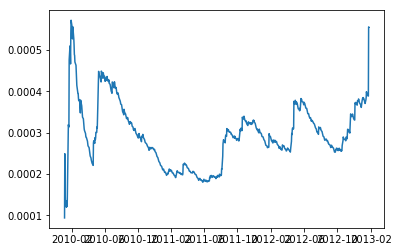

In [112]:
ret=np.log(f['Adj Close'])-np.log(f['Adj Close']).shift(1);
sig=ret.ewm(ignore_na=False,min_periods=0,adjust=True,alpha=0.01).var(bias=False)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sig)

In [ ]:
ret.ewm(ignore_na=False,min_periods=0,adjust=True,alpha=0.94).var

## Regression Analysis

## Plotting with `matplotlib`